In [140]:
# import packages
import pandas as pd
import os

In [141]:
df1 = pd.read_csv('Sales_Data/Sales_January_2019.csv')

df1.head(3)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"


In [142]:
df2 = pd.read_csv('Sales_Data/Sales_April_2019.csv')
df2.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [143]:
# these two dataframes have the same columns and we need to merge all these months in one data file 
filesname = os.listdir('Sales_Data/')

df = pd.concat([ pd.read_csv( "Sales_Data/" + f ) for f in filesname ])

In [144]:
df.to_csv('All_Data.csv', index=False )

In [145]:
df = pd.read_csv('All_Data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [146]:
# renaming columns 
df.rename(columns= lambda x: x.strip().lower().replace(' ', '_'), inplace= True)
df.head(1)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"


In [147]:
#### clean up the data 
df.isnull().sum()


order_id            545
product             545
quantity_ordered    545
price_each          545
order_date          545
purchase_address    545
dtype: int64

In [148]:
nan_df = df[df.isnull().any(axis = 1)]
nan_df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
nan_df.shape

(545, 6)

In [150]:
df = df.drop(nan_df.index)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
order_id            186305 non-null object
product             186305 non-null object
quantity_ordered    186305 non-null object
price_each          186305 non-null object
order_date          186305 non-null object
purchase_address    186305 non-null object
dtypes: object(6)
memory usage: 9.9+ MB


In [152]:
df.duplicated().sum()

618

In [153]:
df = df.drop_duplicates( )

In [164]:
df.quantity_ordered = pd.to_numeric(df.quantity_ordered)
df.price_each = pd.to_numeric(df['price_each'])

In [155]:
## we answer a question about data
# Q1: what was the best month for sales and how much was earned ?
df['month'] = df['order_date'].str[:2]
df = df[ df.month != 'Or' ]
df['month'] = df['month'].astype('int32')

In [156]:
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 7 columns):
order_id            185686 non-null object
product             185686 non-null object
quantity_ordered    185686 non-null object
price_each          185686 non-null object
order_date          185686 non-null object
purchase_address    185686 non-null object
month               185686 non-null int32
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


In [165]:
df['sales'] = df.quantity_ordered * df.price_each

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 8 columns):
order_id            185686 non-null object
product             185686 non-null object
quantity_ordered    185686 non-null int64
price_each          185686 non-null float64
order_date          185686 non-null object
purchase_address    185686 non-null object
month               185686 non-null int32
sales               185686 non-null float64
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 12.0+ MB


In [175]:
# the answer for our question
results = df.groupby('month')['sales'].sum()

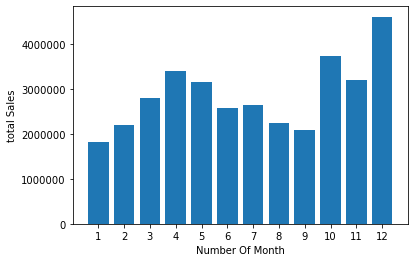

In [180]:
# visulize these data
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months, results)
plt.xticks(months)
plt.xlabel('Number Of Month')
plt.ylabel('total Sales')

plt.show()



,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


140787